https://github.com/qqwweee/keras-yolo3

In [ ]:
%tensorflow_version 1.
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Practical_DL_ITI_2019_CV')

## Setup our environment

First, we'll install the version of Keras our YOLOv3 implementation calls for and verify it installs corrects. 

In [ ]:
# Our YOLOv3 implementation calls for this Keras version
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 9.6MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
# Verify our version is correct
!python -c 'import keras; print(keras.__version__)'

Using TensorFlow backend.
2.2.4


In [ ]:
# Next, we'll grab all the code from our repository of interest 
!git clone https://github.com/josephofiowa/keras-yolo3.git

fatal: destination path 'keras-yolo3' already exists and is not an empty directory.


In [ ]:
# here's what we cloned (also, see "Files" in the left-hand Colab pane)
%ls

 00_Python_numpy_basics.ipynb
 01_IPython.ipynb
'02_Before we begin_the mathematical building blocks of neural networks.ipynb'
'03_Getting started with neural networks-(No examples).ipynb'
'04_Fundamentals of machine learning.ipynb'
 06_Single_Object_Detection.ipynb
'07_multi label classification.ipynb'
 08_multiple_object_detection.ipynb
 08_multiple_object_detection_nms.ipynb
 08_multiple_object_detection_yolov3.ipynb
 2007_test_loc.txt
 2007_train_loc.txt
 2007_val_loc.txt
'2.1 Effect of batch size.ipynb'
'3.1a_Video DNN.ipynb'
'3.1b_Video CNN.ipynb'
 3.5-classifying-movie-reviews.ipynb
 3.6-classifying-newswires.ipynb
 3.7-predicting-house-prices.ipynb
 5.1-introduction-to-convnets.ipynb
 5.2-using-convnets-with-small-datasets.ipynb
 5.3-using-a-pretrained-convnet.ipynb
 5.4-visualizing-what-convnets-learn.ipynb
'Ass 1_Abdelrahman Sultan.ipynb'
'Ass 3.1_Video Dense.ipynb'
'Assignment 1-KNN solution.ipynb'
 Assignment-classifying-newswires.ipynb
 Assignment-predicting-house-prices.i

In [ ]:
# change directory to the repo we cloned
%cd keras-yolo3/

/content/drive/My Drive/Colab Notebooks/Practical_DL_ITI_2019_CV/keras-yolo3


## Set up and train our model

Next, we'll download pre-trained weighs weights from DarkNet, set up our YOLOv3 architecture with those pre-trained weights, and initiate training.


In [ ]:
import os

In [ ]:
if not os.path.isfile('../yolov3.weights'):
  # download our DarkNet weights 
  !wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2020-04-18 17:04:08--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.8’

yolov3.cfg.8        100%[===================>]   8.15K  --.-KB/s    in 0.001s  

2020-04-18 17:04:08 (8.94 MB/s) - ‘yolov3.cfg.8’ saved [8342/8342]



In [ ]:
# call a Python script to set up our architecture with downloaded pre-trained weights

## in convert.py: Change into tensorflow.keras:
'''
from tensorflow.keras import backend as K
from tensorflow.keras.layers import (Conv2D, Input, ZeroPadding2D, Add,
                          UpSampling2D, MaxPooling2D, Concatenate)
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model as plot
'''
!python convert.py yolov3.cfg ../yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2020-04-18 17:04:13.387806: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-04-18 17:04:13.388190: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2fe2a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-04-18 17:04:13.388224: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-04-18 17:04:13.393629: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-18 17:04:13.572585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node

Below, we'll call a "self-contained" Python script that initiates training our model on our custom dataset.

Pay notable attention to:
- setting the paths for our `annotation_path`, `classes_path`, `class_names`. If you move the Roboflow data location, you'll need to update these. 
- `val_split` dictates the size of our training data relative to our taining data
- `lr=1e-3` to set the learning rate of the model. Smaller optimizes more slowly but potentially more precisely.
- `batch_size` for the number of images trained per batch
-  `epoch` inside `model.fit_generator()` sets the number training epochs to increase/decrease training examples (and time)

Consider reading the YOLOv3 paper [here](https://pjreddie.com/media/files/papers/YOLOv3.pdf).

# PASCAL VOC:


In [ ]:
VOC_dir = '../VOCdevkit/'

In [ ]:
if not os.path.isdir(VOC_dir):
  '''
  tar -xvf VOCtrainval_11-May-2012.tar
  tar -xvf VOCtrainval_06-Nov-2007.tar
  tar -xvf VOCtest_06-Nov-2007.tar
  '''
  #!wget http://pjreddie.com/media/files/VOC2012test.tar
  #!tar -xvf VOC2012test.tar
  !wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
  !wget http://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
  !tar -xvf VOCtest_06-Nov-2007.tar
  !tar -xvf VOCtrainval_06-Nov-2007.tar

In [ ]:
#!cat ../VOCdevkit/VOC2007/Annotations/000012.xml

In [ ]:
#!python voc_annotation.py

Xml annotations to txt

In [ ]:
import xml.etree.ElementTree as ET
from os import getcwd

sets=[('2007', 'train'), ('2007', 'val')]#, ('2007', 'test')]

classes = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

#VOC_dir = '../VOCdevkit/'
def convert_annotation(year, image_id, list_file):
    #in_file = open('../VOCdevkit/VOC%s/Annotations/%s.xml'%(year, image_id))
    in_file = open(VOC_dir + 'VOC%s/Annotations/%s.xml'%(year, image_id))
    tree=ET.parse(in_file)
    root = tree.getroot()

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        list_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))

wd = getcwd()

for year, image_set in sets:
    #image_ids = open('../VOCdevkit/VOC%s/ImageSets/Main/%s.txt'%(year, image_set)).read().strip().split()
    image_ids = open(VOC_dir + 'VOC%s/ImageSets/Main/%s.txt'%(year, image_set)).read().strip().split()
    list_file = open(VOC_dir + '%s_%s.txt'%(year, image_set), 'w')
    for image_id in image_ids:
        #list_file.write('%s/VOCdevkit/VOC%s/JPEGImages/%s.jpg'%(wd, year, image_id))
        list_file.write('%s/VOC%s/JPEGImages/%s.jpg'%(VOC_dir, year, image_id))
        #list_file.write('/content/drive/My\ Drive/Colab\ Notebooks/Practical_DL_ITI_2019_CV/VOCdevkit/VOC%s/JPEGImages/%s.jpg'%(year, image_id))
        convert_annotation(year, image_id, list_file)
        list_file.write('\n')
    list_file.close()



In [ ]:
!ls *.txt

2007_train.txt	2007_val.txt


In [ ]:
!mkdir logs

mkdir: cannot create directory ‘logs’: File exists


In [ ]:
"""
Self-contained Python script to train YOLOv3 on your own dataset
"""

import numpy as np
'''
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
'''
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    '''
    annotation_path = '_annotations.txt'  # path to Roboflow data annotations
    log_dir = 'logs/000/'                 # where we're storing our logs
    classes_path = '_classes.txt'         # path to Roboflow class names
    anchors_path = 'model_data/yolo_anchors.txt'
    '''

    annotation_path = VOC_dir + '2007_train.txt'#VOC_dir + 'VOC2007/2007_train.txt'#'../2007_train.txt'
    log_dir = 'logs/'
    classes_path = 'model_data/voc_classes.txt'
    anchors_path = 'model_data/yolo_anchors.txt'

    class_names = get_classes(classes_path)
    print("-------------------CLASS NAMES-------------------")
    print(class_names)
    print("-------------------CLASS NAMES-------------------")
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.2 # set the size of the validation set
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 32
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=20,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 32 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=20,
            initial_epoch=20,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
                        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})([*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()

Using TensorFlow backend.


-------------------CLASS NAMES-------------------
['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
-------------------CLASS NAMES-------------------













Create YOLOv3 model with 9 anchors and 20 classes.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 75) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((75,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 75) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((75,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape ((1,

Load weights model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2001 samples, val on 500 samples, with batch size 32.




Epoch 1/20
62/62 [==============================] - 652s 11s/step - loss: 1188.5643 - val_loss: 171.4532

Epoch 2/20
62/62 [==============================] - 151s 2s/step - loss: 129.2679 - val_loss: 96.3361
Epoch 3/20
62/62 [==============================] - 163s 3s/step - loss: 83.9080 - val_loss: 71.6994
Epoch 4/20
62/62 [==============================] - 140s 2s/step - loss: 64.9985 - val_loss: 57.4232
Epoch 5/20
62/62 [==============================] - 162s 3s/step - loss: 54.3400 - val_loss: 48.8350
Epoch 6/20
62/62 [==============================] - 163s 3s/step - loss: 47.9523 - val_loss: 43.9902
Epoch 7/20
62/62 [==============================] - 163s 3s/step - loss: 43.3694 - val_loss: 40.2627
Epoch 8/20
62/62 [========================

In [ ]:
!ls ./logs/trained_weights_final.h5

In [ ]:
# create a copy of the weights file with a datetime 
# and move that file to your own Drive
%cp ./logs/trained_weights_final.h5 ./logs/trained_weights_final_$(date +%F-%H:%M).h5
%mv ./logs/trained_weights_final_$(date +%F-%H:%M).h5 /content/drive/My\ Drive/Colab\ Notebooks/Object\ Detection/

In [ ]:
## can call this cell instead of the above
# !python train.py

## Use our model for inference

For predictions, we'll call a a Python script called `yolo_video.py` with required arguments for our use case: a path to our specific first stage trained weights (see our blog for why we're using only stage one), a path to our custom class names, and a flag to specify we're using images.

Additional arguments for `yolo_video.py` are as follows:

```
usage: yolo_video.py [-h] [--model MODEL] [--anchors ANCHORS]
                     [--classes CLASSES] [--gpu_num GPU_NUM] [--image]
                     [--input] [--output]

positional arguments:
  --input        Video input path
  --output       Video output path

optional arguments:
  -h, --help         show this help message and exit
  --model MODEL      path to model weight file, default model_data/yolo.h5
  --anchors ANCHORS  path to anchor definitions, default
                     model_data/yolo_anchors.txt
  --classes CLASSES  path to class definitions, default
                     model_data/coco_classes.txt
  --gpu_num GPU_NUM  Number of GPU to use, default 1
  --image            Image detection mode, will ignore all positional arguments
```

In [ ]:
#!python yolo_video.py --model="./logs/trained_weights_stage_final.h5" --classes="" --image

For input image names into the above, consider trying the following:

- `00a7a49c47d51fd16a4cbb17e2d2cf86.jpg` # white-king works! + knight
- `015d0d7ff365f0b7492ff079c8c7d56c.jpg` # black-queen mixes up
- `176b28b5c417f39a9e5d37545fca5b4c.jpg` # finds only five
- `4673f994f60a2ea7afdddc1b752947c0.jpg` # white-rook (thinks king)
- `5ca7f0cb1c500554e65ad031190f8e9f.jpg` # white-pawn (missed white-king)
- `fbf15139f38a46e02b5f4061c0c9b08f.jpg` # black-king success!

You can view these images in your Colab notebook by clicking on the image name in the expanded left-hand panel (Files → keras-yolo3 → IMG_NAME ).

In [ ]:
#!python yolo_video.py --model="./logs/trained_weights_final.h5" --classes="./model_data/voc_classes.txt" --image --input ./VOCdevkit/VOC2007/JPEGImages/000001.jpg --output ./logs/out_img.jpg 

In [ ]:
%tensorflow_version 1.
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

In [ ]:
import sys

from yolo import YOLO, detect_video
from PIL import Image

def detect_img(yolo, img, out_img):
    print('Loading img: ', img)

    #img = input('Input image filename:')
    try:
        image = Image.open(img)
    except:
        print('Open Error! Try again!')
    else:
        r_image = yolo.detect_image(image)
        print('Saving img:', out_img)
        r_image.save(out_img)
        r_image.show()
    
        return r_image
        #yolo.close_session()

FLAGS = None





Using TensorFlow backend.


Orig YOLO (Darknet):

./model_data/yolo.h5 model, anchors, and classes loaded.
Loading img:  ../VOCdevkit/VOC2007/JPEGImages/009961.jpg
(416, 416, 3)
Found 3 boxes for img
sofa 0.33 (60, 0) (500, 333)
dog 0.86 (68, 0) (414, 322)
person 0.45 (131, 9) (500, 368)
11.178946300000007
Saving img: ./logs/out_img.jpg


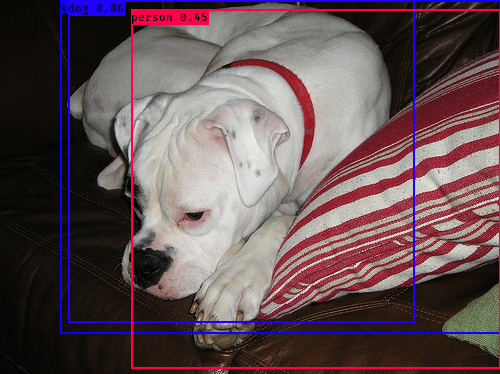

In [ ]:
# class YOLO defines the default value, so suppress any default here


model_path = './model_data/yolo.h5'#'./logs/trained_weights_final.h5'


anchors_path = './model_data/yolo_anchors.txt'

classes_path = './model_data/coco_classes.txt'#'./model_data/voc_classes.txt'

YOLO.get_defaults("gpu_num")




inp_img = VOC_dir + 'VOC2007/JPEGImages/009961.jpg'
out_img = './logs/out_img.jpg'
det_img = detect_img(YOLO(model_path=model_path,anchors_path=anchors_path,classes_path=classes_path), inp_img, out_img)
det_img
#detect_video(YOLO(**vars(FLAGS)), FLAGS.input, FLAGS.output)

Fine tuned YOLO (top layers only):

In [ ]:
model_path ='./logs/trained_weights_stage_1.h5'  #'/content/drive/My Drive/Colab Notebooks/Practical_DL_ITI_2019_CV/keras-yolo3/logs/trained_weights_final_2020-04-14-19:20.h5'

In [ ]:
from keras.models import load_model
m = load_model(model_path)
m.summary()

ValueError: ignored

In [ ]:
from yolo3.model import yolo_body
import numpy as np
from keras.layers import Input
def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)

classes_path = 'model_data/voc_classes.txt'
anchors_path = 'model_data/yolo_anchors.txt'

class_names = get_classes(classes_path)
print("-------------------CLASS NAMES-------------------")
print(class_names)
print("-------------------CLASS NAMES-------------------")
num_classes = len(class_names)
anchors = get_anchors(anchors_path)
num_anchors = len(anchors)

m = yolo_body(Input(shape=(None,None,3)), num_anchors//3, num_classes)
m.load_weights(model_path) # make sure model, anchors and classes match
m.summary()

-------------------CLASS NAMES-------------------
['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
-------------------CLASS NAMES-------------------
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_73 (BatchNo (None, None, None, 3 128         conv2d_76[0][0]                  
___________

The above two cells indicate that the loaded model, is always a yolo_body, not including the loss. Even if in the training it is defined as: 
```
model = Model([model_body.input, *y_true], model_loss)

```

But inside YOLO class in yolo.py, in generate function, the loading is as follows:

```
        try:
            self.yolo_model = load_model(model_path, compile=False)
        except:
            self.yolo_model = tiny_yolo_body(Input(shape=(None,None,3)), num_anchors//2, num_classes) \
                if is_tiny_version else yolo_body(Input(shape=(None,None,3)), num_anchors//3, num_classes)
            self.yolo_model.load_weights(self.model_path) # make sure model, anchors and classes match
        else:
            assert self.yolo_model.layers[-1].output_shape[-1] == \
                num_anchors/len(self.yolo_model.output) * (num_classes + 5), \
                'Mismatch between model and given anchor and class sizes'
```

If the model is defined with loss, we go to the except part as shown in the first cell. In that case, we load the body, then put the weights on it, which will not include the loss.

Following that, in the detect_image in YOLO class, the graph is run as follows:
```
out_boxes, out_scores, out_classes = self.sess.run(
            [self.boxes, self.scores, self.classes],
            feed_dict={
                self.yolo_model.input: image_data,
                self.input_image_shape: [image.size[1], image.size[0]],
                K.learning_phase(): 0
            })

```

Where the 3 nodes are linked in init of YOLO as:
```
self.boxes, self.scores, self.classes = self.generate()
```

Where in generate, they are set to the output of yolo_eval as:

```
boxes, scores, classes = yolo_eval(self.yolo_model.output, self.anchors,
                len(self.class_names), self.input_image_shape,
                score_threshold=self.score, iou_threshold=self.iou)
        return boxes, scores, classes

```

where yolo_eval takes the yolo_body output and parses it, giving the boxes, scores and classes, applying all the NMS and thresholds as part of the graph

./logs/trained_weights_stage_1.h5 model, anchors, and classes loaded.
Loading img:  ../VOCdevkit/VOC2007/JPEGImages/009961.jpg
(416, 416, 3)
Found 1 boxes for img
dog 0.69 (93, 36) (406, 317)
4.29048508599999
Saving img: ./logs/out_img.jpg


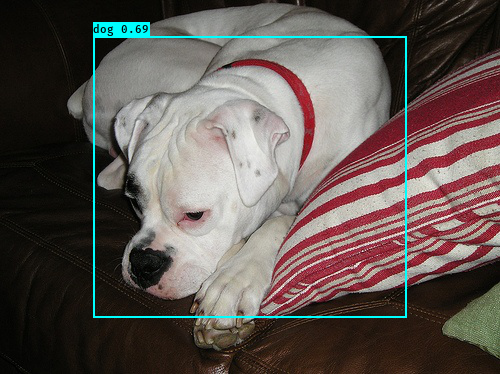

In [ ]:


# class YOLO defines the default value, so suppress any default here
# Orig YOLO (Darknet):

model_path = './logs/trained_weights_stage_1.h5'


anchors_path = './model_data/yolo_anchors.txt'

classes_path = './model_data/voc_classes.txt'

YOLO.get_defaults("gpu_num")




inp_img = VOC_dir + 'VOC2007/JPEGImages/009961.jpg'
out_img = './logs/out_img.jpg'
det_img = detect_img(YOLO(model_path=model_path,anchors_path=anchors_path,classes_path=classes_path), inp_img, out_img)
det_img
#detect_video(YOLO(**vars(FLAGS)), FLAGS.input, FLAGS.output)


Fine tuned YOLO (unfreeze ALL layers):

./logs/trained_weights_final.h5 model, anchors, and classes loaded.
Loading img:  ../VOCdevkit/VOC2007/JPEGImages/009961.jpg
(416, 416, 3)
Found 1 boxes for img
dog 0.69 (93, 36) (406, 317)
5.596610226999928
Saving img: ./logs/out_img.jpg


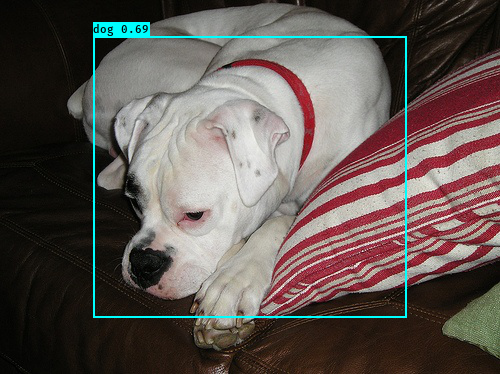

In [ ]:


# class YOLO defines the default value, so suppress any default here


model_path = './logs/trained_weights_final.h5'


anchors_path = './model_data/yolo_anchors.txt'

classes_path = './model_data/voc_classes.txt'

YOLO.get_defaults("gpu_num")




inp_img = '../VOCdevkit/VOC2007/JPEGImages/009961.jpg'
out_img = './logs/out_img.jpg'
det_img = detect_img(YOLO(model_path=model_path,anchors_path=anchors_path,classes_path=classes_path), inp_img, out_img)
det_img
#detect_video(YOLO(**vars(FLAGS)), FLAGS.input, FLAGS.output)


## Move currently trained model to GDrive

Optionally, you may want to save the new weights that your model trained so that the next time you run this notebook, you can either skip training and use these weights for inference or begin training where you left off with this weights file.

Following the below will link your Colab notebook to your Google Drive, and save the weights (named as the current time you saved them to enforce a unique file name) in your Drive folder.